In [49]:
import selection_sort as selection
import heap_sort as heap
import merge_sort as merge
import quick_sort as quick
import insertion_sort as insert
import random
from timeit import Timer

In [50]:
def crear_listas_con_10k_elementos(N):
    lista = list()
    for i in range(N):
        set1 = list(range(10000))
        random.shuffle(set1)
        lista.append(set1)
    return lista

In [57]:
## item b)
sets_datos = crear_listas_con_10k_elementos(10)
#defino la cantidad de elementos que quiero hacer
cantidad_de_elementos_set = [50, 100, 500, 1000, 2000, 3000, 4000, 5000, 7500, 10000]
lista_algoritmos = [heap.heap_sort, selection.selection_sort, merge.merge_sort, quick.quick_sort, insert.insertion_sort]

resultados = {}

In [58]:
conjunto = 0;
for set_actual in sets_datos:
    resultados_por_cantidad_elementos = {}
    for i in cantidad_de_elementos_set:
        lista_resultados_por_algoritmo = list()
        resultados_por_set = {}
        # agarro y a cada algoritmo de la lista lista_algoritmos le tomo el tiempo
        # que tarda en ordenar la lista en set_actual
        for f in lista_algoritmos:
            parametro_lista = set_actual[:i]
            t = Timer(lambda: f(parametro_lista))
            tiempo = t.timeit(1)
            lista_resultados_por_algoritmo.append(tiempo)
        resultados_por_cantidad_elementos[i] = lista_resultados_por_algoritmo
    # guardo todos los resultados de cada conjunto de datos para cada cantidad de elementos para cada algoritmo
    resultados[conjunto] = resultados_por_cantidad_elementos
    conjunto += 1

In [59]:
## item c)
tiempos_medio_algoritmo_rango = {}

for i in resultados.keys():
    print ('Conjunto de datos' + str(i)) 
    for j in resultados[i].keys():
        print ('Cantidad de elementos: ' + str(j))
        print ('heap sort:' + str(resultados[i][j][0]))
        print ('selection sort:' + str(resultados[i][j][1]))
        print ('merge sort:' + str(resultados[i][j][2]))
        print ('quick sort:' + str(resultados[i][j][3]))
        print ('insertion sort:' + str(resultados[i][j][4]))
        if i == 0:
            tiempos_medio_algoritmo_rango[j] = {
                'heapsort': resultados[i][j][0],
                'selectionsort' : resultados[i][j][1],
                'mergesort': resultados[i][j][2],
                'quicksort': resultados[i][j][3],
                'insertion': resultados[i][j][4]
            }
        else:
            tiempos_medio_algoritmo_rango[j] = {
                'heapsort': (tiempos_medio_algoritmo_rango[j]['heapsort'] + resultados[i][j][0])*.5,
                'selectionsort' : (tiempos_medio_algoritmo_rango[j]['selectionsort'] + resultados[i][j][1])*.5,
                'mergesort': (tiempos_medio_algoritmo_rango[j]['mergesort'] + resultados[i][j][2])*.5,
                'quicksort': (tiempos_medio_algoritmo_rango[j]['quicksort'] + resultados[i][j][3])*.5,
                'insertion': (tiempos_medio_algoritmo_rango[j]['insertion'] + resultados[i][j][4])*.5
            }

Conjunto de datos0
Cantidad de elementos: 50
heap sort:0.0005598120001195639
selection sort:0.000270316999831266
merge sort:0.00048597300019537215
quick sort:0.0002181429999836837
insertion sort:0.00018040700024357648
Cantidad de elementos: 100
heap sort:0.0009057839997694828
selection sort:0.0005098520000501594
merge sort:0.0005292450000524695
quick sort:0.00024376200008191518
insertion sort:0.0003901529998984188
Cantidad de elementos: 500
heap sort:0.0052462280000327155
selection sort:0.012082343000201945
merge sort:0.003043758000330854
quick sort:0.002000560999931622
insertion sort:0.009998002999964228
Cantidad de elementos: 1000
heap sort:0.012003069000002142
selection sort:0.0505002519998925
merge sort:0.006227486000170757
quick sort:0.003981405000104132
insertion sort:0.041851195999697666
Cantidad de elementos: 2000
heap sort:0.024297172000387945
selection sort:0.1882948560000841
merge sort:0.01237957200009987
quick sort:0.007761592999941058
insertion sort:0.1691577930000676
Cant

In [60]:
## item d)
for t in tiempos_medio_algoritmo_rango.keys():
    print ('tiempo medio con ' + str(t) + ' iteraciones: ')
    print ('\t heapsort: ' + str(tiempos_medio_algoritmo_rango[t]['heapsort']))
    print ('\t selectionsort: ' + str(tiempos_medio_algoritmo_rango[t]['selectionsort']))
    print ('\t mergesort: ' + str(tiempos_medio_algoritmo_rango[t]['mergesort']))
    print ('\t quicksort: ' + str(tiempos_medio_algoritmo_rango[t]['quicksort']))
    print ('\t insertion sort: ' + str(tiempos_medio_algoritmo_rango[t]['insertion']))

tiempo medio con 50 iteraciones: 
	 heapsort: 0.00035714576180456703
	 selectionsort: 0.00014969028119349304
	 mergesort: 0.00026665988651597416
	 quicksort: 0.00011818790630702125
	 insertion sort: 0.00010213628714872414
tiempo medio con 100 iteraciones: 
	 heapsort: 0.0007811232051047057
	 selectionsort: 0.00046753836126978143
	 mergesort: 0.000492087544850861
	 quicksort: 0.0002530385607046881
	 insertion sort: 0.0003718947560544805
tiempo medio con 500 iteraciones: 
	 heapsort: 0.005254665050869356
	 selectionsort: 0.01229298645708976
	 mergesort: 0.002992393041017394
	 quicksort: 0.001694591955178737
	 insertion sort: 0.010503288839634806
tiempo medio con 1000 iteraciones: 
	 heapsort: 0.01174047658971844
	 selectionsort: 0.04890324287871284
	 mergesort: 0.006166604312494606
	 quicksort: 0.0034274883027354264
	 insertion sort: 0.04257621743369011
tiempo medio con 2000 iteraciones: 
	 heapsort: 0.025422287191397608
	 selectionsort: 0.20036189914458458
	 mergesort: 0.013089603142629

heapsort
selectionsort
mergesort
quicksort
insertion


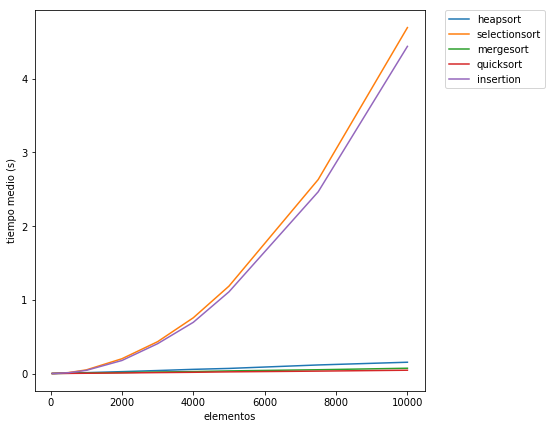

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#grafico los tiempos medios para cada algoritmo
algoritmos_x = {}
algoritmos_y = {}
for t in tiempos_medio_algoritmo_rango.keys():
    #print ('t ' + str(t))
    for alg in tiempos_medio_algoritmo_rango[t].keys():
        algoritmos_x[alg] = list()    
        algoritmos_y[alg] = list()
        
for t in tiempos_medio_algoritmo_rango.keys():
    for alg in tiempos_medio_algoritmo_rango[t].keys():
        algoritmos_x[alg].append(t)
        algoritmos_y[alg].append(tiempos_medio_algoritmo_rango[t][alg])
    #print ('tiempo medio con ' + str(t) + ' iteraciones: ')
    #print ('\t heapsort: ' + str(tiempos_medio_algoritmo_rango[t]['heapsort']))
    #print ('\t selectionsort: ' + str(tiempos_medio_algoritmo_rango[t]['selectionsort']))
    #print ('\t mergesort: ' + str(tiempos_medio_algoritmo_rango[t]['mergesort']))
    #print ('\t quicksort: ' + str(tiempos_medio_algoritmo_rango[t]['quicksort']))
plt.figure(figsize=(7,7))
for alg in algoritmos_x.keys():
    print(alg)
    #print(algoritmos_x[alg])
    #print(algoritmos_y[alg])
    plt.plot(algoritmos_x[alg], algoritmos_y[alg], label=alg)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('elementos')   
plt.ylabel('tiempo medio (s)')   
plt.show()
        
        
    #algoritmo1_y.append(tiempos_medio_algoritmo_rango[t]['heapsort'])
    #print ([t,tiempos_medio_algoritmo_rango[t]['heapsort']])
# tendria que agarrar un algoritmo y graficar todos sus tiempos

#plt.plot(algoritmo1_x, algoritmo1_y)
#plt.xlabel('iteraciones')
#plt.ylabel('tiempo medio')
#plt.show()

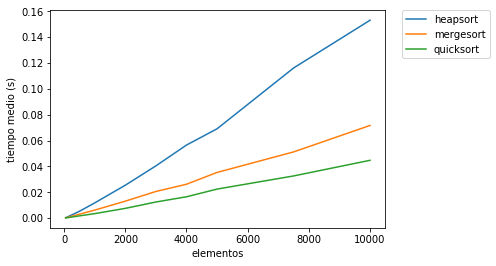

In [64]:
## ahora muestro para todos los casos el tiempo de mergesort, quicksort y heapsort
for alg in algoritmos_x.keys():
    #print(alg)
    if (alg == 'insertion' or alg == 'selectionsort'):
        continue
    #print(algoritmos_x[alg])
    #print(algoritmos_y[alg])
    plt.plot(algoritmos_x[alg], algoritmos_y[alg], label=alg)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('elementos')   
plt.ylabel('tiempo medio (s)')   
plt.show()